# <center> Sloan Digital Sky Survey DR14 </center> 

### <center> Shrivaths Shyam (A59019544) and Vancheeswaran Vaidyanathan (A59011835) </center>

## <a id="TOC"> Table of Contents </a>
</br>
<div style="text-align: justify; font-size: 16px">
<ol> <li> <a href="#Intro"> Introduction </a> </li>
    <li> <a href="#Back"> Background </a> </li>
    <li> <a href="#Libs"> Importing Libraries </a>  </li> 
    <li> <a href="#EDA"> Exploratory Data Analysis </a>  </li>
    <li> <a href="#DataW"> Data Wrangling </a> </li>
    <li> <a href="#BuildModel"> Build Models </a> </li>
    <li> <a href="#Metrics"> Metrics </a> </li>
    <li> <a href="#infer"> Inferences </a> </li>
    <li> <a href="#Conclusion"> Conclusion </a> </li>
    <li> <a href="#Ref"> References </a> </li>
    </ol>
</div>

##   <a id="Intro"> Introduction </a>

<div style="text-align: justify; font-size: 16px"> In this project we use <B> Sloan Digital Sky Survey </B> dataset from Kaggle. This dataset has <B>17 feature columns </B> and one column that needs to be predicted. The column that needs to be predicted is called <B> "class" </B> which is one of <B> star, quasar or galaxy </B>. We perform data cleaning, feature engineering, EDA and some visualisations in order to know more about the data. Post this, we apply Machine Learning algorithms such as <B> Logistic Regression, Decision Tree Classifier, XGBoost and Random Forest </B> to solve the classification problem. Once the algorithms are implemented we compare the performance of the various algorithms based on metrics such as <B> confusion matrix, accuracy,  AUC-ROC, F1 Score and Log Loss</B>. </div>

## <a id="Back"> Background </a>

<div style="text-align: justify; font-size: 16px"> <B> SDSS </B> (Sloan Digital Sky Survey) is a multispectral imaging and redhift survey that was started in 2000 at <B> Apache Point Observatory in New Mexico, United States</B>. It uses a combination of multi array CCD Camera and multi fiber spectrograph to generate the characteristics of various objects in the sky. The data contains values such as <B> run, camcol and field </B>that helps in uniquely identifying a field, which is a fundamental unit of the images from the SDSS. It also provides spectroscopic information through the features <B> u, g, r, i and z </B>. More information on how the data was obtained and the decription of the data can be found <a href="http://www.sdss3.org/dr9/imaging/imaging_basics.php"> here </a>  </div>

## <a id="Libs"> Import libraries </a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
!pip3 install xgboost
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
!pip3 install graphviz
import graphviz 

## <a id="EDA"> Exploratory Data Analysis </a>


<div style="text-align: justify;font-size: 16px"> We first perform Exploratory Data Analysis on the data to find patterns and distribution of the data. Here we first load the data from the CSV file to a pandas DataFrame and plot graphs that gives a visual representation of the data.</div>

In [2]:
# Load Dataset
sdss=pd.read_csv("SDSS.csv")

In [3]:
#Take a peek at the data
sdss.head(8)

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
5,1.237650e+18,183.847174,0.173694,19.43133,18.46779,18.16451,18.01475,18.04155,752,301,4,269,3.649550e+17,STAR,0.000315,324,51666,594
6,1.237650e+18,183.864379,0.019201,19.38322,17.88995,17.10537,16.66393,16.36955,752,301,4,269,3.232870e+17,GALAXY,0.100242,287,52023,559
7,1.237650e+18,183.900081,0.187473,18.97993,17.84496,17.38022,17.20673,17.07071,752,301,4,269,3.722370e+18,STAR,0.000315,3306,54922,515


### Distribution of the Data based on the classes(Star, Galaxy, Quasar)

<div style="text-align: justify; font-size: 16px">
    <p>Now we are plotting the distribution of the classes in the data. Here we have used the countplot function from the Seaborn module to count the number of rows that are present in the data for each class.</p>
    <p>As we can see from the graph below, there are more rows of data for Galaxy with almost 5000 rows of data, followed closely behind by the Star class at around 4000 rows while there is least number of rows for the Quasar(QSO) class.</p>
</div>

<AxesSubplot:xlabel='class', ylabel='count'>

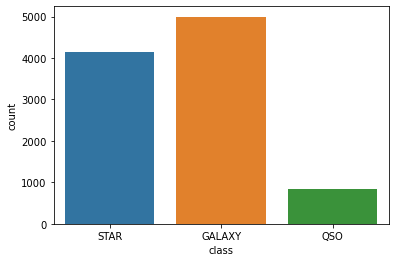

In [4]:
# Let's check how the data is distributed across various classes
sns.countplot(data=sdss,x="class")

### Histograms of features

<div style="text-align: justify; font-size: 16px">
    <p>Let us now look at how each of the features (redshift, ra, dec, u, g, r, i, z) are distributed across the different classes. We have used the histplot function from the Seaborn module in Python with bin count of 30 to count the number of rows for each of the classes in the data.</p>
</div>

#### Redshift

<div style="text-align: justify; font-size: 16px">
    <p>From the graph, we can observe that the distributions looks similar to a gaussian for the Star class with the values smaller and most values close to or equal to zero. The redshift for the Galaxy classes are also close to zero with all values greater than or equal to zero. Unlike the Star and Galaxy classes, the Quasar class has a widely distributed values for the redshift. </p>
</div>

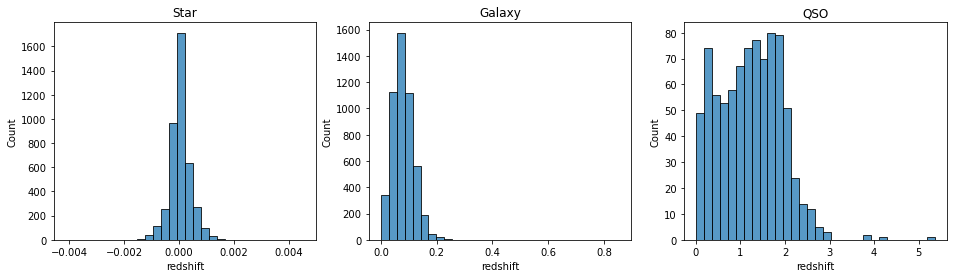

In [5]:
# Plotting redshift distribution over various classes

fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(16, 4))
ax = sns.histplot(sdss[sdss['class']=='STAR'].redshift, bins=30, ax = axes[0])
ax.set_title('Star')
ax = sns.histplot(sdss[sdss['class']=='GALAXY'].redshift, bins=30, ax = axes[1])
ax.set_title('Galaxy')
ax = sns.histplot(sdss[sdss['class']=='QSO'].redshift, bins=30, ax = axes[2])
ax = ax.set_title('QSO')

#### RA (right ascension)

<div style="text-align: justify; font-size: 16px">
    <p>From the plots, we can observe that the distributions for the ra (right ascension) column for all the classes are distributed similarly with some values that are far away from the majority values and the values are greater than zero.</p>
</div>

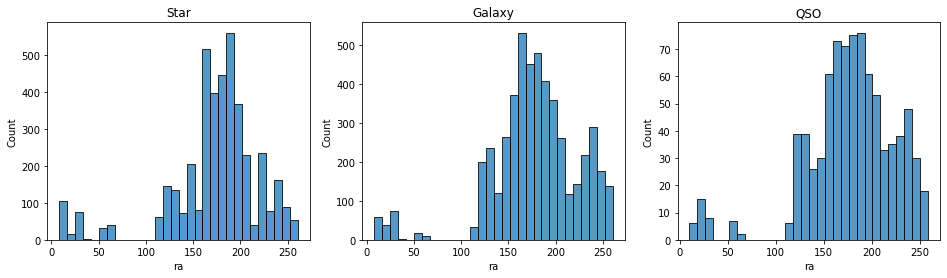

In [6]:
# Plotting ra(right ascension) distribution over various classes

fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(16, 4))
ax = sns.histplot(sdss[sdss['class']=='STAR'].ra, bins=30, ax = axes[0])
ax.set_title('Star')
ax = sns.histplot(sdss[sdss['class']=='GALAXY'].ra, bins=30, ax = axes[1])
ax.set_title('Galaxy')
ax = sns.histplot(sdss[sdss['class']=='QSO'].ra, bins=30, ax = axes[2])
ax = ax.set_title('QSO')

#### DEC (Declination)

<div style="text-align: justify; font-size: 16px">
    <p>From the graphs below, we can observe that the distributions for the dec (declination) column for all the classes are distributed sparsely with most of the values equal to zero. The range of the values is also large compared to other features.</p>
</div>

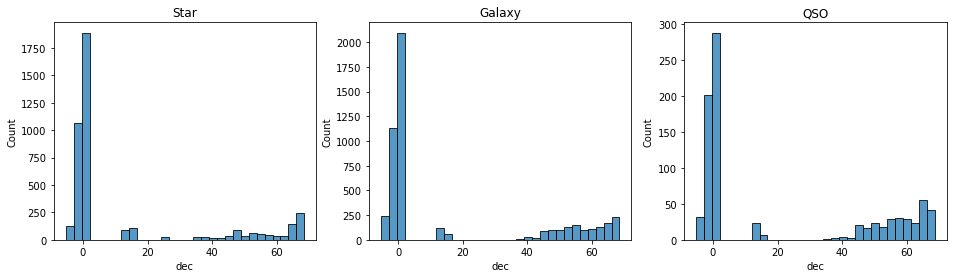

In [7]:
# Plotting dec (declination) distribution over various classes

fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(16, 4))
ax = sns.histplot(sdss[sdss['class']=='STAR'].dec, bins=30, ax = axes[0])
ax.set_title('Star')
ax = sns.histplot(sdss[sdss['class']=='GALAXY'].dec, bins=30, ax = axes[1])
ax.set_title('Galaxy')
ax = sns.histplot(sdss[sdss['class']=='QSO'].dec, bins=30, ax = axes[2])
ax = ax.set_title('QSO')

#### U (ultraviolet band)

<div style="text-align: justify; font-size: 16px">
    <p>From the plots, we can observe that the distributions for the <strong>u</strong> column for all the classes are distributed similarly with the count of the values increasing as the u value increases. All the values are greater than zero. </p>
</div>

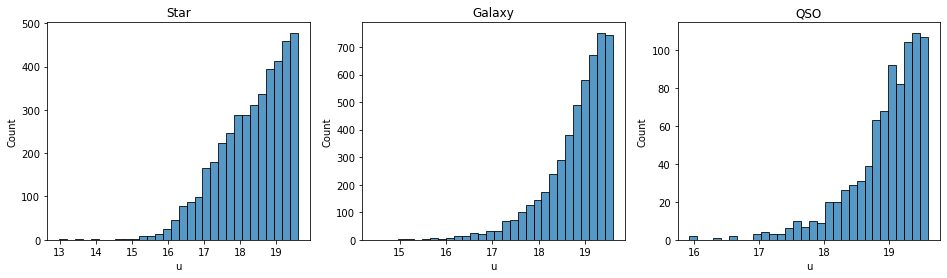

In [8]:
# Plotting u distribution over various classes

fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(16, 4))
ax = sns.histplot(sdss[sdss['class']=='STAR'].u, bins=30, ax = axes[0])
ax.set_title('Star')
ax = sns.histplot(sdss[sdss['class']=='GALAXY'].u, bins=30, ax = axes[1])
ax.set_title('Galaxy')
ax = sns.histplot(sdss[sdss['class']=='QSO'].u, bins=30, ax = axes[2])
ax = ax.set_title('QSO')

#### G (green band)

<div style="text-align: justify; font-size: 16px">
    <p>From the plots, we can observe that the distributions for the <strong>g</strong> column for all the classes are distributed similarly with the count of the values increasing as the g value increases. All the values are greater than zero with the distribution for the star class wider compared to the other two classes.</p>
</div>

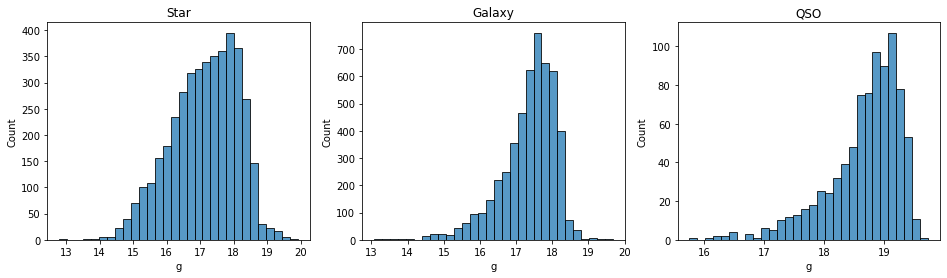

In [9]:
# Plotting g distribution over various classes

fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(16, 4))
ax = sns.histplot(sdss[sdss['class']=='STAR'].g, bins = 30, ax = axes[0])
ax.set_title('Star')
ax = sns.histplot(sdss[sdss['class']=='GALAXY'].g, bins = 30, ax = axes[1])
ax.set_title('Galaxy')
ax = sns.histplot(sdss[sdss['class']=='QSO'].g, bins = 30, ax = axes[2])
ax = ax.set_title('QSO')

#### R (red band)

<div style="text-align: justify; font-size: 16px">
    <p>From the plots, we can observe that the distributions for the <strong>r</strong> column for all the classes look similar to gaussian. The values of Quasar class is more widely distributed than the other two classes.</p>
</div>

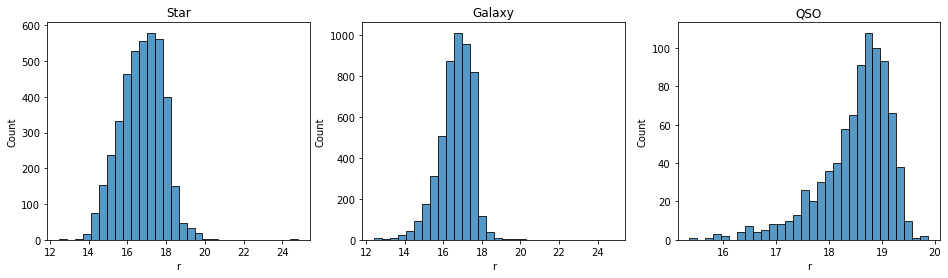

In [10]:
# Plotting r distribution over various classes

fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(16, 4))
ax = sns.histplot(sdss[sdss['class']=='STAR'].r, bins = 30, ax = axes[0])
ax.set_title('Star')
ax = sns.histplot(sdss[sdss['class']=='GALAXY'].r, bins = 30, ax = axes[1])
ax.set_title('Galaxy')
ax = sns.histplot(sdss[sdss['class']=='QSO'].r, bins = 30, ax = axes[2])
ax = ax.set_title('QSO')

#### I (infrared band)

<div style="text-align: justify; font-size: 16px">
    <p>From the plots, we can observe that the distributions for the <strong>i</strong> column for all the classes look similar to gaussian where the Quasar values more towards 19 while Star and Galaxy have their majority values around 16.</p>
</div>

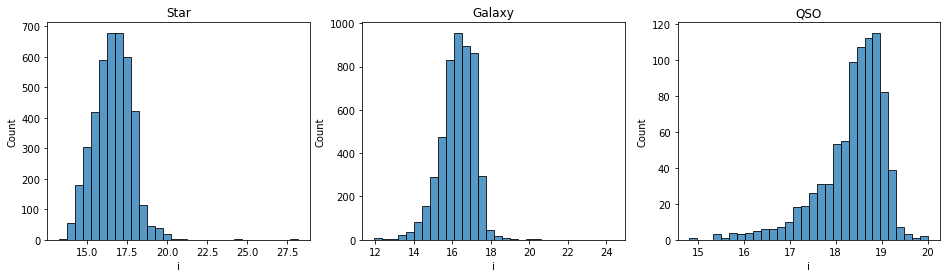

In [11]:
# Plotting i distribution over various classes

fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(16, 4))
ax = sns.histplot(sdss[sdss['class']=='STAR'].i, bins = 30, ax = axes[0])
ax.set_title('Star')
ax = sns.histplot(sdss[sdss['class']=='GALAXY'].i, bins = 30, ax = axes[1])
ax.set_title('Galaxy')
ax = sns.histplot(sdss[sdss['class']=='QSO'].i, bins = 30, ax = axes[2])
ax = ax.set_title('QSO')

#### Z (near-infrared band)

<div style="text-align: justify; font-size: 16px">
    <p>From the plots, we can observe that the distributions for the <strong>z</strong> column for all the classes look similar to gaussian. The z values for the Star class is much wider than Galaxy and Quasar classes.</p>
</div>

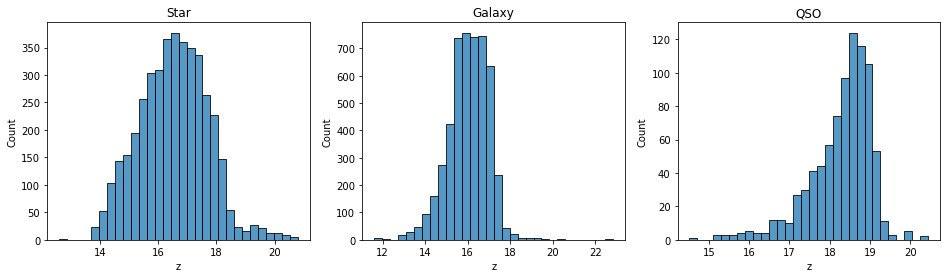

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(16, 4))
ax = sns.histplot(sdss[sdss['class']=='STAR'].z, bins = 30, ax = axes[0])
ax.set_title('Star')
ax = sns.histplot(sdss[sdss['class']=='GALAXY'].z, bins = 30, ax = axes[1])
ax.set_title('Galaxy')
ax = sns.histplot(sdss[sdss['class']=='QSO'].z, bins = 30, ax = axes[2])
ax = ax.set_title('QSO')

## Correlation between the features

<div style="text-align: justify; font-size: 16px">
    <p>Now we try to find the relations between the different feature columns by calculating the correlation coefficients using the Pearson Correlation Coefficient. The coefficient is calculated using the below formula:</p>
    <p style = "text-align: center; font-size: 20px">$\rho = \frac{\text{cov}(X,Y)}{\sigma_x \sigma_y}$</p>
    <p> Where the values of x and y are from the columns that are under consideration. The estimated value of the correlation between the columns is given by,</p>
    <p style = "text-align: center; font-size: 20px">$r = \frac{{}\sum_{i=1}^{n} (x_i - \overline{x})(y_i - \overline{y})}
{\sqrt{\sum_{i=1}^{n} (x_i - \overline{x})^2(y_i - \overline{y})^2}}$</p>
    <p> where $\overline{x}$ and $\overline{y}$ are the means of the columns that are under consideration. The range of the correlation coefficient is between -1 and 1, where 1 represents maximum positive correlation (when one variable increases  and causes the other variable also to increase) and -1 signifies maximum negative correlation (when one variable decreases  and causes the other variable also to decrease) while 0 means they are uncorrelated.</p>
    <h5> Inference from Correlation Maps </h5>
    <p>The correlation maps ploted below represents how correlated the features are, where darker the red of the block, more positively correlated are the columns, while the darker the blue of the block represents how less or negatively correlated they are. This can also be observed in the legend that is provided with the maps.</p>
    <p>From the maps we can notice that all the features are positively correlated as all the values are positive, with the u, g, r, i, z features being the most positively correlated.</p>
    <p>The redshift, dec and ra features are least correlated with the u, g, r, i, z features of the data for the Galaxy and Quasar class while they are more correlated (comparative) for the Star class.</p>
    <p>Note: Since a variable has maximum correlation with itself the diagonal blocks of the correlation map is the darkest red, indicating maximum positive correlation.</p>
</div>

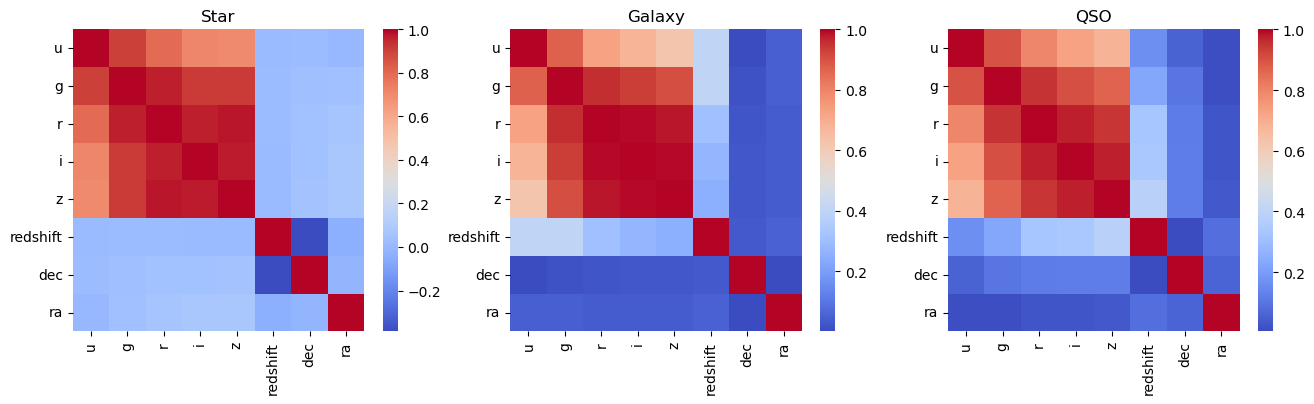

In [13]:
# Plotting the correlation between u, g, r, i, z, redshift, dec and ra feature columns

fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(16, 4))
fig.set_dpi(100)
ax = sns.heatmap(sdss[sdss['class']=='STAR'][['u', 'g', 'r', 'i', 'z','redshift','dec','ra']].corr(), ax = axes[0], cmap='coolwarm')
ax.set_title('Star')
ax = sns.heatmap(sdss[sdss['class']=='GALAXY'][['u', 'g', 'r', 'i', 'z','redshift','dec','ra']].corr(), ax = axes[1], cmap='coolwarm')
ax.set_title('Galaxy')
ax = sns.heatmap(sdss[sdss['class']=='QSO'][['u', 'g', 'r', 'i', 'z','redshift','dec','ra']].corr(), ax = axes[2], cmap='coolwarm')
ax = ax.set_title('QSO')

## <a id="DataW"> Data Wrangling </a>

In [14]:
# Deleting columns that clearly might not have any impact on the class
sdss=sdss.drop(['objid', 'run', 'rerun', 'camcol', 'field', 'specobjid','fiberid'], axis=1)

In [15]:
encoder= LabelEncoder()
pred=encoder.fit_transform(sdss['class'])
sdss=sdss.drop(['class'],axis=1)

In [16]:
scaler = StandardScaler()

In [17]:
sdss_columns=sdss.columns
sdss=scaler.fit_transform(sdss)

In [18]:
sdss

array([[ 0.16745842, -0.58492272,  1.03148637, ..., -0.36973112,
         1.03148936,  1.30931064],
       [ 0.16886159, -0.58311429,  0.05243046, ..., -0.36984929,
        -0.63621258, -0.87919741],
       [ 0.17057433, -0.58347525,  0.92156796, ..., -0.05302706,
        -0.65633905, -0.60919097],
       ...,
       [-0.92039468,  1.46090664,  0.16753826, ..., -0.37074104,
         3.26608697,  2.69309363],
       [-0.92197294,  1.46432109,  0.31801835, ..., -0.33364691,
        -0.56688806, -0.70581092],
       [-0.91804124,  1.46639319,  0.79229193, ..., -0.06510125,
        -0.56688806, -0.70581092]])

In [19]:
X_train, X_test, y_train, y_test = train_test_split(sdss, pred, test_size=0.33, random_state=42)

## <a id="BuildModel"> Build Models </a>

### Logistic Regression

<div style="text-align: justify; font-size: 16px">
Logistic regression is a special case of generalized linear model that is predominantly used in classification problems. In this case, we have 3 target classes. Since we use multi_class in the default setting the model will use "auto" as the default parameter. This parameter - ‘auto’ selects ‘ovr’ (one versus rest) if the data is binary, or if solver=’liblinear’, and otherwise selects ‘multinomial’ $^{[1]}$. 
</div>
    <h3> Mathematical Formulation: </h3> </br>

<div style="text-align: justify; font-size: 16px">
In the case of linear regression we express Y as 

$$ Y = \beta_0 + \beta_1 X $$

But the problem with this is that a line cannot always be a good fit for binary/categorical values. Therefore we define the logistic function (S)

$$ S = {e^{(\beta_0 + \beta_1X)}\over 1+e^{(\beta_0+\beta_1X)}} $$

Once this is framed, the problem is about estimating the values of $\beta_0$ and $\beta_1$ which can be done using MLE [Maximum Likelihood Estimation]. 
</div>


In [20]:
Logistic_Regression_Model= LogisticRegression() # initialising the model

In [21]:
Logistic_Regression_Model.fit(X_train,y_train)

/Users/vancheeswaran/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
Logistic_Regression_Model.get_params() # Model Parameters

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [23]:
Logistic_Regression_Preds= Logistic_Regression_Model.predict(X_test) # getting predictions

In [24]:
feature_importance_logistic= Logistic_Regression_Model.coef_[0] # getting feature importance scores

/Users/vancheeswaran/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

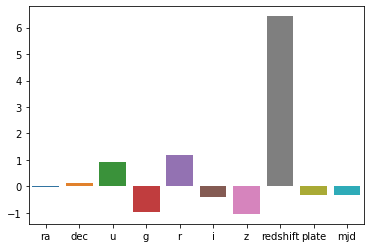

In [25]:
sns.barplot(sdss_columns,feature_importance_logistic) # Plotting the feature importance scores

<div style="text-align: justify; font-size: 16px">
This plot demonstrates which features are given most preference while training the logistic regression model. Redshift, followed by r and u are the 3 most important features as per logistic regression model. This does seem to make sense as the classes we are classifying in general can be distinguished by their distance (often can be found by checking the redshift) from observatories. Also, spectral information can be very useful in discriminating these classes.
    </div>

### Decision Tree Classifier

<div style="text-align: justify; font-size: 16px">
Decision Tree is a non-parametric supervised learning model that can be used for classification and regression $^{[2]}$. In this case we use it for a classification problem. The nodes in the tree are chosen in such a way as to best split the data by using the CART [Classification and Regression Tree] algorithm. The quality of the split can be measured using Gini, Entropy or Log Loss.  

There are two methods for improving the performance of decision trees. Both of these methods are ensemble methods. They are:
    <ul>
        <li>Bagging: This method randomly samples the data and subsets them into independent sets for training independent decision trees. The result from all the decision trees are averaged out to get the final result. This method decreases the variance and overfitting.</li>
    <li>Boosting: This method trains on the complete training data and then the subsequent trees try to learn from the mistakes that the tree in the previous iteration made. This way a stronger model is built from a weak model. This method decreases bias and underfitting.</li>
    </ul>

In [26]:
Decision_Tree_Classifier_Model=DecisionTreeClassifier() # initialising the model

In [27]:
Decision_Tree_Classifier_Model.fit(X_train,y_train) # fitting the model

DecisionTreeClassifier()

In [28]:
Decision_Tree_Classifier_Model.get_params() # Model Parameters

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

[Text(0.5, 0.875, 'X[7] <= -0.364\ngini = 0.566\nsamples = 6700\nvalue = [3365, 530, 2805]'),
 Text(0.25, 0.625, 'X[1] <= 2.122\ngini = 0.011\nsamples = 2819\nvalue = [15, 1, 2803]'),
 Text(0.125, 0.375, 'X[2] <= 1.153\ngini = 0.011\nsamples = 2817\nvalue = [14, 1, 2802]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'X[2] <= -1.912\ngini = 0.5\nsamples = 2\nvalue = [1, 0, 1]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'X[7] <= 0.191\ngini = 0.236\nsamples = 3881\nvalue = [3350, 529, 2]'),
 Text(0.625, 0.375, 'X[3] <= 1.133\ngini = 0.023\nsamples = 3370\nvalue = [3331, 37, 2]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'X[5] <= -0.023\ngini = 0.072\nsamples = 511\nvalue = [19, 492, 0]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

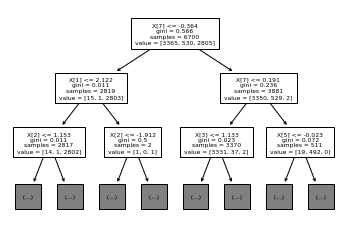

In [29]:
tree.plot_tree(Decision_Tree_Classifier_Model,max_depth=2,fontsize=6) # Taking a look at how decision tree is built

In [30]:
Decision_Tree_Classifier_preds= Decision_Tree_Classifier_Model.predict(X_test) # getting predictions

In [31]:
feature_importance_Decision_Tree=Decision_Tree_Classifier_Model.feature_importances_ # getting feature importance scores

/Users/vancheeswaran/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

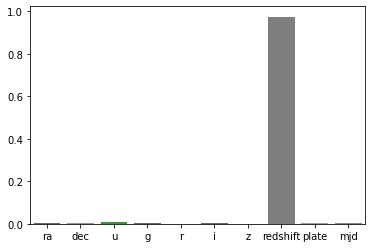

In [32]:
sns.barplot(sdss_columns,feature_importance_Decision_Tree) # Plotting the feature importance scores

<div style="text-align: justify; font-size: 16px">
This plot shows that the decision tree algorithm predominantly uses the reshift parameter as the most important feature. This essentially could mean that the decision tree function could be overfitting. We will explore more on this in the metrics section.
   </div>

### Random Forest

<div style="text-align: justify; font-size: 16px">
The Random Forest Model is an extension of the decision tree model. We perform bagging and feature randomness to generate multiple decision trees. Depending on whether the underlying problem is classification or regression, we either choose the majority voting or average the values. This model minimises variance and overfitting. $^{[3]}$ </div>

In [33]:
Random_Forest_Classifier_Model=RandomForestClassifier() # initialising the model

In [34]:
Random_Forest_Classifier_Model.fit(X_train,y_train) # fitting the model

RandomForestClassifier()

In [35]:
Random_Forest_Classifier_Model.get_params() # Model Parameters

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [36]:
Random_Forest_Classifier_Preds= Random_Forest_Classifier_Model.predict(X_test) # getting predictions

In [37]:
feature_importance_Random_Forest=Random_Forest_Classifier_Model.feature_importances_ # getting feature importance scores 

/Users/vancheeswaran/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

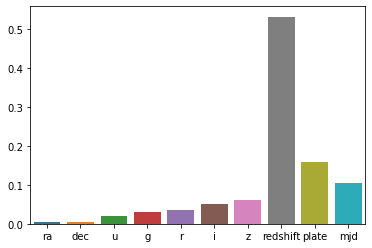

In [38]:
sns.barplot(sdss_columns,feature_importance_Random_Forest) # Plotting the feature importance scores

<div style="text-align: justify; font-size: 16px">
As expected, Random Forest doesn't overfit when compared to that of decision tree. This is evident by the fact that Redshift, Plate and MJD parameters are the 3 most important parameters. Recall that the plot for decision tree had only one peak value and that was for Redshift. 
    </div>

###  XGBoost

<div style="text-align: justify; font-size: 16px">
XGBoost is another modification of Decision Tree. This algorithm uses GBDT [Gradient Boosted Decision Tree] instead of bagging and feature randomness as used in Random Forest model. This technique basically trains shallow decision trees in each iteration, the shallow decision tree in the subsequent iteration builds on the experiences in the previous iteration. This model minimises Bias and underfitting. $^{[4]}$</div>

In [39]:
XGBoost_Classifier_Model= XGBClassifier() # initialising the model

In [40]:
XGBoost_Classifier_Model.fit(X_train,y_train) # fitting the model 

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)

In [41]:
XGBoost_Classifier_Model.get_params() # Model Parameters

{'objective': 'multi:softprob',
 'use_label_encoder': None,
 'base_score': 0.5,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': 0,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_bin': 256,
 'max_cat_threshold': 64,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 6,
 'max_leaves': 0,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'sampling_method': 'uniform',
 'scale_pos_weight': None,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [42]:
XGBoost_Classifier_preds=XGBoost_Classifier_Model.predict(X_test)  # getting predictions

In [43]:
feature_importance_XGBoost=XGBoost_Classifier_Model.feature_importances_ # getting feature importance scores 

/Users/vancheeswaran/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

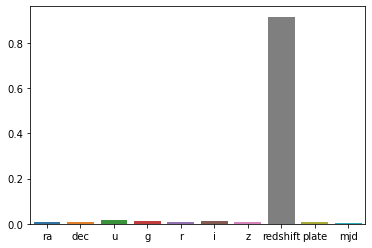

In [44]:
sns.barplot(sdss_columns,feature_importance_XGBoost) # Plotting the feature importance scores

<div style="text-align: justify; font-size: 16px">
As expected, this model overfits as it tries to reduce bias and underfitting. The most important feature for this model is Redshift parameter.
    </div>


## <a id="Metrics"> Metrics </a>

### Confusion Matrix

<div style="text-align: justify; font-size: 16px">
    <p>A confusion matrix, also known as an error matrix, is a specific table layout that allows visualization of the performance of an algorithm. Each row of the matrix represents the instances in an actual class while each column represents the instances in a predicted class, or vice versa.<sup>[5]</sup></p>
</div>

<AxesSubplot:>

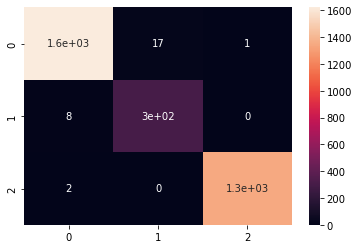

In [45]:
sns.heatmap(confusion_matrix(XGBoost_Classifier_preds, y_test), annot=True)

<AxesSubplot:>

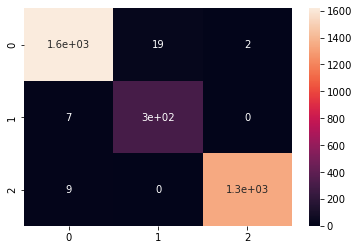

In [46]:
sns.heatmap(confusion_matrix(Random_Forest_Classifier_Preds, y_test), annot=True)

<AxesSubplot:>

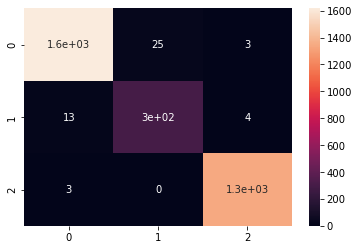

In [47]:
sns.heatmap(confusion_matrix(Decision_Tree_Classifier_preds, y_test),annot=True)

<AxesSubplot:>

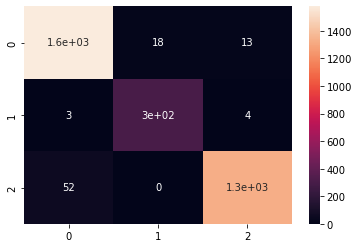

In [48]:
sns.heatmap(confusion_matrix(Logistic_Regression_Preds, y_test),annot=True)

### Accuracy

<div style="text-align: justify; font-size: 16px">
    <p>Accuracy score is the percent of the values that the model predicted correctly. This is a simple metric that gives an idea of how accurate the model is in classifying the different classes correctly. <sup> [6] </sup> </p>
    <p>Here we have calculated the accuracy of the 4 different classifiers using the accuracy_score function available in the sklearn.metrics module in python.</p>
    <p>Based on the values that we have obtained for the classifiers we can notice that the XGBoost Classifier has the highest accuracy with 99.15% and the Logistic Regression Classifier has the lowest with 97.27%.</p> 
</div>

</br> $$ Accuracy\ =\ \frac{y_{correct}}{y_{total}} $$  

In [49]:
accuracy=[]

In [50]:
accuracy.append(accuracy_score(Logistic_Regression_Preds,y_test))

In [51]:
accuracy[-1]

0.9727272727272728

In [52]:
accuracy.append(accuracy_score(Decision_Tree_Classifier_preds,y_test))

In [53]:
accuracy[-1]

0.9854545454545455

In [54]:
accuracy.append(accuracy_score(Random_Forest_Classifier_Preds,y_test))

In [55]:
accuracy[-1]

0.9887878787878788

In [56]:
accuracy.append(accuracy_score(XGBoost_Classifier_preds,y_test))

In [57]:
accuracy[-1]

0.9915151515151515

###   AUC-ROC

<div style="text-align: justify; font-size: 16px">
    <p>The AUC-ROC (AUC -  Area Under Curve, ROC - Receiver Operating Characteristics) is a unit of measurement to determine how good a classifier is based on the classifier's ability to separate the different classes. The higher the score of the AUC-ROC score the better is the classifier. Since it is a probability based measurement, the range of values of the AUC-ROC score is between 0 and 1. $^{[7]}$</p>
    <p>Here we have calculated the Log Loss of the 4 different classifiers using the roc_auc_score function available in the sklearn.metrics module in python.</p>
    <p>Based on the values that we have obtained for the classifiers we can notice that the Random Forest Classifier has the highest AUC-ROC score and the Decision Tree Classifier has the lowest.</p>
</div>

In [58]:
roc=[]

In [59]:
roc.append(roc_auc_score(y_test,Logistic_Regression_Model.predict_proba(X_test),multi_class='ovr'))

In [60]:
roc[-1]

0.9930736663846123

In [61]:
roc.append(roc_auc_score(y_test,Decision_Tree_Classifier_Model.predict_proba(X_test),multi_class='ovr'))

In [62]:
roc[-1]

0.9804738186011694

In [63]:
roc.append(roc_auc_score(y_test,Random_Forest_Classifier_Model.predict_proba(X_test),multi_class='ovr'))

In [64]:
roc[-1]

0.9965488841628236

In [65]:
roc.append(roc_auc_score(y_test,XGBoost_Classifier_Model.predict_proba(X_test),multi_class='ovr'))

In [66]:
roc[-1]

0.9974030432353004

### Log Loss

<div style="text-align: justify; font-size: 16px">
    <p>The log loss of a model is the summation over the log of the difference between the predicted value and the actual value. The larger the value of the loss loss function then the poorer is the classification model as the difference between the true and predicted value increases, which in turn increases the log loss.</p>
     <p>Here we have calculated the Log Loss of the 4 different classifiers using the log_loss function available in the sklearn.metrics module in python. $^{[8]}$</p>
    <p>Based on the values obtained from the log loss of each of the classifiers, we can notice that the Decision Tree classifier has the highest value indicating it to be the worst classifier while XGBoost is the best classifier based on the log loss values.</p> </br>
</div>
$$ L_{log} = -y*log(p)-(1-y)*log(1-p) $$
$$ where, y \ \epsilon\  \{0,1\} \ and \  p\  -\  probability\  of\  class\  y_i\  happening $$

In [67]:
log=[]

In [68]:
log.append(log_loss(y_test,Logistic_Regression_Model.predict_proba(X_test)))

In [69]:
log[-1]

0.12353393810251807

In [70]:
log.append(log_loss(y_test,Decision_Tree_Classifier_Model.predict_proba(X_test)))

In [71]:
log[-1]

0.5023822021077937

In [72]:
log.append(log_loss(y_test,Random_Forest_Classifier_Model.predict_proba(X_test)))

In [73]:
log[-1]

0.07705246314641194

In [74]:
log.append(log_loss(y_test,XGBoost_Classifier_Model.predict_proba(X_test)))

In [75]:
log[-1]

0.04318144331828314

### F1 Score

<div style="text-align: justify; font-size: 16px">
    <p>The F-score or F-measure is calculated from the precision and recall of the test, where the precision is the number of true positive results divided by the number of all positive results, including those not identified correctly, and the recall is the number of true positive results divided by the number of all samples that should have been identified as positive.<sup>[9][10]</sup></p>
    <p>The range of F1 Score is between 0 and 1, where 0 indicates the worst model and 1 indicates the perfect model. Here we have calculated the F1 score of the 4 different classifiers using the f1_score function available in the sklearn.metrics module in python.</p>
    <p>From the values that we have obtained for the F1 Score of the different models, we can see that the value of the XGBoost Classifier being the highest at 0.991 (approx.) and that of Logistic Regression the least at 0.972 (approx.).</p> </br>
    $$ F1 = 2 * \frac{(precision * recall)}{(precision + recall)} $$
</div>

In [76]:
f1=[]

In [77]:
f1.append(f1_score(y_test,Logistic_Regression_Preds,average="weighted"))

In [78]:
f1[-1]

0.9726986505429723

In [79]:
f1.append(f1_score(y_test,Decision_Tree_Classifier_preds,average="weighted"))

In [80]:
f1[-1]

0.9853961452071829

In [81]:
f1.append(f1_score(y_test,Random_Forest_Classifier_Preds,average="weighted"))

In [82]:
f1[-1]

0.9887254924698526

In [83]:
f1.append(f1_score(y_test,XGBoost_Classifier_preds,average="weighted"))

In [84]:
f1[-1]

0.9914716597193828

## <a id="infer">Inferences </a>

### Accuracy Plot

<div style="text-align: justify; font-size: 16px">
This section gives an idea of the relative performance of the models we have built previously in terms of accuracy of the model. We have two plots for this. <br>

<B> Plot 1: </B> This bar plot just has the accuracy of the various models. It is a bit difficult to infer which model is performing better as they all have similar accuracy. So we have plot 2. </br>
<B> Plot 2: </B> This plot is the difference between each model's accuracy and the model with the poorest accuracy.
</div>

In [85]:
models=["Logistic Regression","Decision Tree","Random Forest Classifier","XGBoost Classifier"]

/Users/vancheeswaran/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

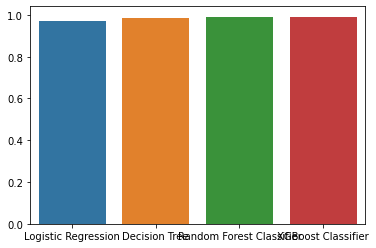

In [86]:
sns.barplot(models,accuracy)

/Users/vancheeswaran/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

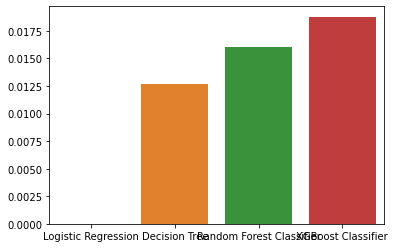

In [87]:
sns.barplot(models,np.array(accuracy)-min(accuracy))

### Inference 1
<br>
<div style="text-align: justify; font-size: 16px">
From plot 2 it is evident that XGBoost performs the best in terms of accuracy, followed by Random Forest, Decision Tree and Logistic Regression.
    </div>

### ROC AUC Plot

<div style="text-align: justify; font-size: 16px">
This section gives an idea of the relative performance of the models we have built previously in terms of the ROC AUC Score. We have two plots for this. <br>

<B> Plot 1: </B> This bar plot just has the ROC AUC score of the various models. It is a bit difficult to infer which model is performing better as they all have similar ROC AUC Score. So we have plot 2. </br>
<B> Plot 2: </B> This plot is the difference between each model's AUC ROC Score and the model with the poorest AUC ROC Score. 
</div>

/Users/vancheeswaran/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

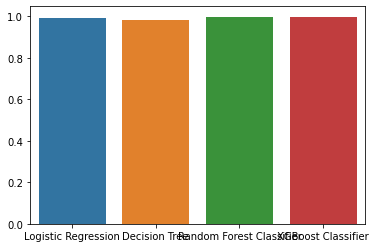

In [88]:
sns.barplot(models,roc)

/Users/vancheeswaran/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

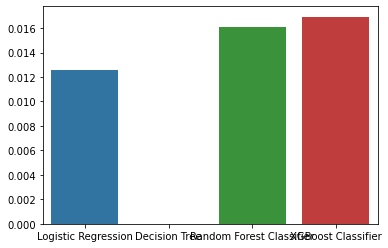

In [89]:
sns.barplot(models,np.array(roc)-min(roc))

### Inference 2
<br>
<div style="text-align: justify; font-size: 16px">
From plot 2 it is evident that XGBoost performs the best in terms of AUC ROC Score, followed by Random Forest, Logistic Regression and Decision Tree.
    </div>

### Log Loss Plot

<div style="text-align: justify; font-size: 16px">
This section gives an idea of the relative performance of the models we have built previously in terms of the log loss. <br>

<B> Plot Description: </B> This bar plot just has the log loss of the various models. Since the differences are bit varied we have used only one plot for this
</div>

/Users/vancheeswaran/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

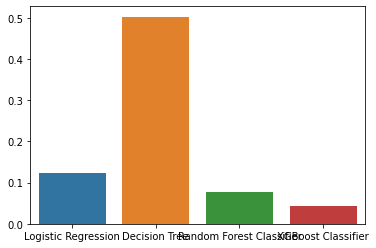

In [90]:
sns.barplot(models,log)

### Inference 3
<br>
<div style="text-align: justify; font-size: 16px">
Lower the log loss the better. Therefore, XGBoost performs the best followed by Random Forest, Logistic Regression and Decision Tree.
    </div>

### F1 Score Plot

<div style="text-align: justify; font-size: 16px">
This section gives an idea of the relative performance of the models we have built previously in terms of the F1 Score. We have two plots for this. </br>
<B> Plot 1: </B> This bar plot just has the F1 score of the various models. It is a bit difficult to infer which model is performing better as they all have similar F1 Score. So we have plot 2. <br>
<B> Plot 2: </B> This plot is the difference between each model's F1 Score and the model with the poorest F1 Score.
</div>

/Users/vancheeswaran/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

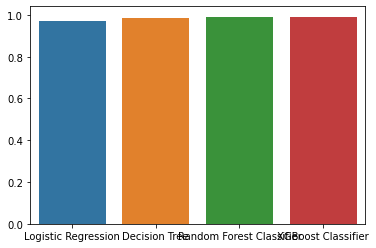

In [91]:
sns.barplot(models,f1)

/Users/vancheeswaran/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

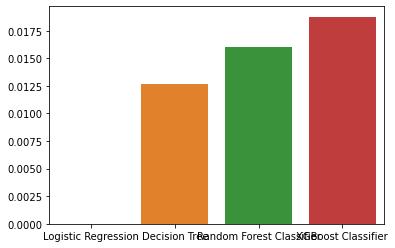

In [92]:
sns.barplot(models,np.array(f1)-min(f1))

### Inference 4
<br>
<div style="text-align: justify; font-size: 16px">
From plot 2 it is evident that XGBoost performs the best in terms of F1 Score, followed by Random Forest, Decision Tree and Logistic Regression.
    </div>

## <a id="Conclusion"> Conclusion </a>
<br>
<div style="text-align: justify; font-size: 16px">
For this particular problem we see that in general XGBoost Classifier performs the best followed by Random Forest, Decision Tree and Logistic Regression. This is evident from the various metrics we have calculated so far. The way we choose a model is often determined by several factors such as their performance metrics, computation time, scalability, etcetera. In general, XGBoost Classifiers are very easy to implement, scale and consumes less time for computation as they can easily be parallised. Considering all these factors, XGBoost is probably the best model for this particular problem. 
    </div>

## <a id="Ref">References</a>

[1] https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html </br>
[2] https://scikit-learn.org/stable/modules/tree.html#classification </br>
[3] https://www.ibm.com/cloud/learn/random-forest </br>
[4] https://www.nvidia.com/en-us/glossary/data-science/xgboost/ </br>
[5] https://en.wikipedia.org/wiki/Confusion_matrix </br>
[6] https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html </br>
[7] https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html </br>
[8] https://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html </br>
[9] https://en.wikipedia.org/wiki/F-score </br>
[10] https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html </br>